Collin Rinehart \newline
ASEN6010 Homework 1

# Function Definitions

Task 11 



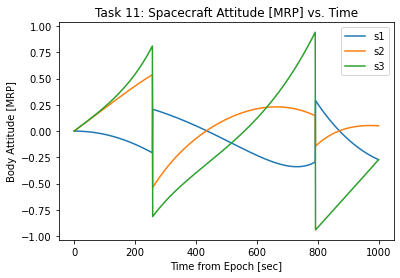

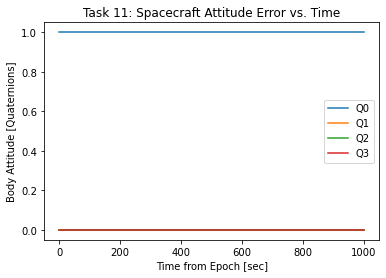

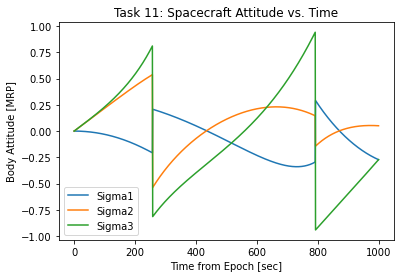

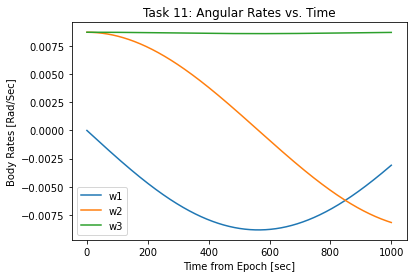

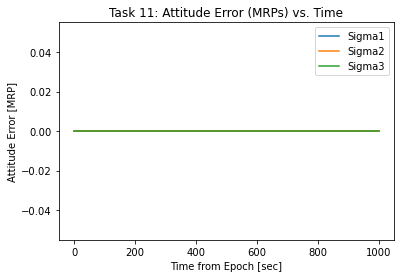

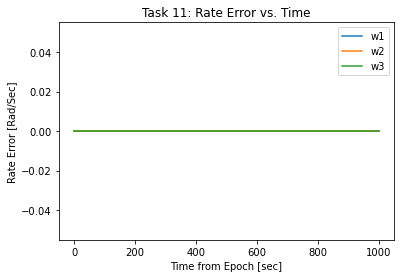

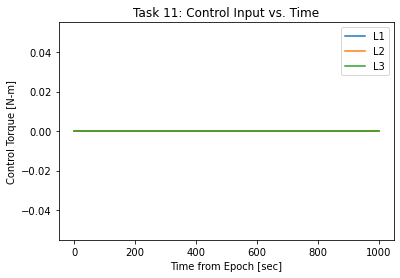

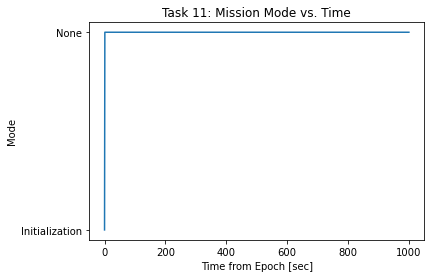

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Collin Rinehart
# ASEN 5010: Spacecraft Attitude Dynamics and Control
# Mars Orbiting Attitude Dynamics and Control Semester Project
# 21 April 2020

# All Vectors/Matrices in this script use NumPy Matrices (similar to NumPy Array's)


def generate_states(time):
    # Calculates the Inertial R and V vectors of a given spacecraft
    r_mars = 3396.19
    mu = 42828.3  # Mu mars [km^3/s^2]
    r_LMO = r_mars + 400
    r_GMO = r_mars + 17028.01
    RAAN_LMO = math.radians(20)
    RAAN_GMO = math.radians(0)
    i_LMO = math.radians(30)
    i_GMO = math.radians(0)
    theta_dot_LMO = 0.000884797  # [rad/s]
    theta_dot_GMO = 0.0000709003  # [rad/s]
    theta_LMO_t = math.radians(60) + theta_dot_LMO * time
    theta_GMO_t = math.radians(250) + theta_dot_GMO * time

    r_orbitframe_LMO = np.matrix([[r_LMO], [0], [0]])
    r_orbitframe_GMO = np.matrix([[r_GMO], [0], [0]])
    v_orbitframe_LMO = np.matrix([[0], [math.sqrt(mu / r_LMO)], [0]])
    v_orbitframe_GMO = np.matrix([[0], [math.sqrt(mu / r_GMO)], [0]])

    # Calculates the [NH] DCM for both spacecraft
    NH_LMO = np.matrix([[math.cos(RAAN_LMO)*math.cos(theta_LMO_t)-math.sin(RAAN_LMO)*math.cos(i_LMO)*math.sin(theta_LMO_t),
                         -math.cos(RAAN_LMO)*math.sin(theta_LMO_t) - math.sin(RAAN_LMO)*math.cos(i_LMO)*math.cos(theta_LMO_t),
                         math.sin(RAAN_LMO)*math.sin(i_LMO)],
                  [math.sin(RAAN_LMO) * math.cos(theta_LMO_t) + math.cos(RAAN_LMO) * math.cos(i_LMO) * math.sin(theta_LMO_t),
                   -math.sin(RAAN_LMO) * math.sin(theta_LMO_t) + math.cos(RAAN_LMO) * math.cos(i_LMO) * math.cos(theta_LMO_t),
                   -math.cos(RAAN_LMO) * math.sin(i_LMO)],
                  [math.sin(i_LMO)*math.sin(theta_LMO_t), math.sin(i_LMO)*math.cos(theta_LMO_t), math.cos(i_LMO)]])

    NH_GMO = np.matrix([[math.cos(RAAN_GMO) * math.cos(theta_GMO_t) - math.sin(RAAN_GMO) * math.cos(i_GMO) * math.sin(theta_GMO_t),
                         -math.cos(RAAN_GMO) * math.sin(theta_GMO_t) - math.sin(RAAN_GMO) * math.cos(i_GMO) * math.cos(theta_GMO_t),
                         math.sin(RAAN_GMO) * math.sin(i_GMO)],
                        [math.sin(RAAN_GMO) * math.cos(theta_GMO_t) + math.cos(RAAN_GMO) * math.cos(i_GMO) * math.sin(theta_GMO_t),
                         -math.sin(RAAN_GMO) * math.sin(theta_GMO_t) + math.cos(RAAN_GMO) * math.cos(i_GMO) * math.cos(theta_GMO_t),
                         -math.cos(RAAN_GMO) * math.sin(i_GMO)],
                        [math.sin(i_GMO) * math.sin(theta_GMO_t), math.sin(i_GMO) * math.cos(theta_GMO_t), math.cos(i_GMO)]])

    r_inertialframe_LMO = NH_LMO * r_orbitframe_LMO
    v_inertialframe_LMO = NH_LMO * v_orbitframe_LMO
    r_inertialframe_GMO = NH_GMO * r_orbitframe_GMO
    v_inertialframe_GMO = NH_GMO * v_orbitframe_GMO

    return r_inertialframe_LMO, v_inertialframe_LMO, r_inertialframe_GMO, v_inertialframe_GMO


def tilde(vec):
    #  Uses Numpy Matrix column vectors to define a tilde matrix
    #  Returns a Numpy matrix
    vec_tilde = np.matrix([[0, -vec.A1[2], vec.A1[1]],
                           [vec.A1[2], 0, -vec.A1[0]],
                           [-vec.A1[1], vec.A1[0], 0]])
    return vec_tilde


def mag(a):
    # Calculates the Euclidean Norm (i.e. magnitude) of a vector
    return np.linalg.norm(a)


def H_N(t):
    # Calculates the 'Inertial-to-Hill Frame' DCM
    RAAN_LMO = math.radians(20)
    i_LMO = math.radians(30)
    theta_dot_LMO = 0.000884797  # [rad/s]
    theta_LMO = math.radians(60) + theta_dot_LMO * t

    HN = np.matrix([[math.cos(RAAN_LMO)*math.cos(theta_LMO)-math.sin(RAAN_LMO)*math.cos(i_LMO)*math.sin(theta_LMO),
                     math.sin(RAAN_LMO) * math.cos(theta_LMO) + math.cos(RAAN_LMO) * math.cos(i_LMO) * math.sin(theta_LMO),
                     math.sin(i_LMO)*math.sin(theta_LMO)],
                    [-math.cos(RAAN_LMO)*math.sin(theta_LMO) - math.sin(RAAN_LMO)*math.cos(i_LMO)*math.cos(theta_LMO),
                     -math.sin(RAAN_LMO) * math.sin(theta_LMO) + math.cos(RAAN_LMO) * math.cos(i_LMO) * math.cos(theta_LMO),
                     math.sin(i_LMO)*math.cos(theta_LMO)],
                    [math.sin(RAAN_LMO)*math.sin(i_LMO), -math.cos(RAAN_LMO) * math.sin(i_LMO), math.cos(i_LMO)]])
    return HN


def Rs_N(t):
    # Calculates the 'Inertial-to-Sun-Pointing Frame' DCM
    RsN = np.matrix([[-1, 0, 0], [0, 0, 1], [0, 1, 0]])
    return RsN


def RsN_rate(t):
    # Returns the Rotation rate vector for the Sun-pointing frame in the inertial frame
    # Sun-pointing frame defined as an inertial frame for this project
    w_RsN = np.matrix([[0], [0], [0]])
    return w_RsN


def Rn_N(t):
    # Calculates the 'Inertial-to-Nadir Pointing Frame' DCM as a function of time
    Rn_H = np.matrix([[-1, 0, 0], [0, 1, 0], [0, 0, -1]])
    HN = H_N(t)
    RnN = Rn_H * HN
    return RnN


def RnN_rate(t):
    # Calculates the rotation rate vector of the Nadir pointing frame in the inertial frame as a function of time
    theta_dot_LMO = 0.000884797  # [rad/s]
    w_dot_H = np.matrix([[0], [0], [theta_dot_LMO]])  # expressed in Rn frame (w_H and w_Rn are the same)
    N_H = H_N(t).T
    return N_H*w_dot_H


def Rc_N(t):
    # Calculates the 'Inertial-to-GMO-Pointing Frame' DCM as a function of time
    r_N_LMO, v_N_LMO, r_N_GMO, v_N_GMO = generate_states(t)  # Calculates the two spacecraft states at the given time

    dr = r_N_GMO - r_N_LMO
    dr_unit = dr/mag(dr)
    r1 = -dr_unit
    n3 = np.matrix([[0], [0], [1]])
    r2_notunit = np.matrix(np.cross(dr_unit.T, n3.T)).T
    r2 = r2_notunit/mag(r2_notunit)
    r3_notunit = np.matrix(np.cross(r1.T, r2.T)).T
    r3 = r3_notunit/mag(r3_notunit)

    N_Rc = np.matrix([[r1.A1[0], r2.A1[0], r3.A1[0]], [r1.A1[1], r2.A1[1], r3.A1[1]], [r1.A1[2], r2.A1[2], r3.A1[2]]])
    RcN = N_Rc.T
    return RcN


def RcN_rate(t):
    # Calculates the rotation rate of the GMO-pointing reference frame in inertial frame components
    RcN1 = Rc_N(t)
    RcN2 = Rc_N(t-1)
    dC = (RcN1 - RcN2)
    w_tilde = -dC * RcN1.T
    w_RcN = np.matrix([[-w_tilde[1, 2]], [w_tilde[0, 2]], [-w_tilde[0, 1]]])
    return RcN1.T*w_RcN


def check_for_shadow_set(MRP):
    # Checks if the MRPs should be switched to the shadow set. If not, it returns itself
    if mag(MRP) > 1:
        shadowset = (-1/(mag(MRP)**2)) * MRP
        return shadowset
    else:
        return MRP

def check_for_shadow_set_Q(Q):
    # Checks if the MRPs should be switched to the shadow set. If not, it returns itself
    if Q.A1[0] < -0.1:
        return -Q
    else:
        return Q


def MRP2DCM(sigma):
    # Calculates a DCM from an MRP set. sigma must be a numpy matrix column vector
    DCM = np.identity(3) + (1/(1 + mag(sigma)**2)**2) * (8*tilde(sigma)**2 - 4*(1-mag(sigma)**2)*tilde(sigma))
    return DCM


def DCM2MRP(DCM):
    # Calculates MRPs from a DCM. DCM must be a 3x3 numpy matrix
    Q = DCM_to_Quaternion(DCM)
    sigma1 = Q.A1[1]/(1 + Q.A1[0])
    sigma2 = Q.A1[2]/(1 + Q.A1[0])
    sigma3 = Q.A1[3]/(1 + Q.A1[0])
    sigma = check_for_shadow_set(np.matrix([[sigma1], [sigma2], [sigma3]]))
    return sigma


def DCM_to_Quaternion(DCM):
    # Calculates quaternions from a DCM using Shepard's Method
    B0_sqrd = 0.25 * (1 + np.trace(DCM))
    B1_sqrd = 0.25 * (1 + 2 * DCM[0, 0] - np.trace(DCM))
    B2_sqrd = 0.25 * (1 + 2 * DCM[1, 1] - np.trace(DCM))
    B3_sqrd = 0.25 * (1 + 2 * DCM[2, 2] - np.trace(DCM))
    B = [B0_sqrd, B1_sqrd, B2_sqrd, B3_sqrd]

    if max(B) == B0_sqrd:
        B0 = math.sqrt(B0_sqrd)
        B1 = (DCM[1, 2] - DCM[2, 1])/(4*B0)
        B2 = (DCM[2, 0] - DCM[0, 2]) / (4 * B0)
        B3 = (DCM[0, 1] - DCM[1, 0]) / (4 * B0)

    elif max(B) == B1_sqrd:
        B1 = math.sqrt(B1_sqrd)
        B0 = (DCM[1, 2] - DCM[2, 1])/(4*B1)
        B2 = (DCM[0, 1] + DCM[1, 0]) / (4 * B1)
        B3 = (DCM[2, 0] + DCM[0, 2]) / (4 * B1)

    elif max(B) == B2_sqrd:
        B2 = math.sqrt(B2_sqrd)
        B0 = (DCM[2, 0] - DCM[0, 2]) / (4 * B2)
        B1 = (DCM[0, 1] + DCM[1, 0]) / (4 * B2)
        B3 = (DCM[1, 2] + DCM[2, 1]) / (4 * B2)

    elif max(B) == B3_sqrd:
        B3 = math.sqrt(B3_sqrd)
        B0 = (DCM[0, 1] - DCM[1, 0]) / (4 * B3)
        B1 = (DCM[2, 0] + DCM[0, 2]) / (4 * B3)
        B2 = (DCM[1, 2] + DCM[2, 1]) / (4 * B3)

    Q = np.matrix([[B0], [B1], [B2], [B3]])
    Q = Q/mag(Q)
    return Q

def Quaternion_to_MRP(Q):
    B0 = Q.A1[0]
    B1 = Q.A1[1]
    B2 = Q.A1[2]
    B3 = Q.A1[3]

    s1 = B1/(1+B0)
    s2 = B2/(1+B0)
    s3 = B3/(1+B0)

    MRP = np.matrix([[s1],[s2],[s3]])
    return MRP

def MRP_to_Quaternion(MRP):
    sigma_2 = np.linalg.norm(MRP)**2
    B0 = (1 - sigma_2)/(1 + sigma_2)
    B1 = 2*MRP.A1[0]/(1 + sigma_2)
    B2 = 2*MRP.A1[1]/(1 + sigma_2)
    B3 = 2*MRP.A1[2]/(1 + sigma_2)

    Q = np.matrix([[B0],[B1],[B2],[B3]])

    return Q

def attitude_error(t, sigma_bn, b_w_BN, RN_funct, wRN_funct):
    # Calculates the attitude error and rate error based on current states and current reference
    BN = MRP2DCM(sigma_bn)
    BR = BN * RN_funct(t).T
    wRN = wRN_funct(t)
    sigma_BR = DCM2MRP(BR)  # calculates the attitude error
    b_wBR = b_w_BN - BN*wRN  # calculates rate error in body frame
    return sigma_BR, b_wBR


def evaluate_control_reference(time, sigmaBN, wBN, control_reference=None):
    # Control Gains
    K = 0.00555555555  # [Nm]
    P = 0.1666666666  # [units]

    # Evaluate which control reference to use at the current time step
    if control_reference == 'Full-Mission':
        r_N_LMO , v_N_LMO, r_N_GMO, v_N_GMO = generate_states(time)
        angle = math.degrees(math.acos(np.dot(r_N_LMO.T, r_N_GMO)/(mag(r_N_LMO)*mag(r_N_GMO))))

        # Evaluate which mission mode/reference frame is desired
        if r_N_LMO.A1[1] > 0:   # If LMO spacecraft is 'in the sun'
            control_reference = 'Sun-Track'
        elif angle < 35:      # If GMO spacecraft is visible by LMO spacecraft
            control_reference = 'GMO-Point'
        else:   # if neither of these are true, point at Mars and do science
            control_reference = 'Nadir-Point'

    # Evaluate the current attitude and rate errors
    if control_reference == 'Sun-Track':
        sigmaBR, wBR = attitude_error(time, sigmaBN, wBN, Rs_N, RsN_rate)
        u = -K * sigmaBR - P * wBR
        mission_mode = control_reference
    elif control_reference == 'Nadir-Point':
        sigmaBR, wBR = attitude_error(time, sigmaBN, wBN, Rn_N, RnN_rate)
        u = -K * sigmaBR - P * wBR
        mission_mode = control_reference
    elif control_reference == 'GMO-Point':
        sigmaBR, wBR = attitude_error(time, sigmaBN, wBN, Rc_N, RcN_rate)
        u = -K * sigmaBR - P * wBR
        mission_mode = control_reference
    elif control_reference is None:
        sigmaBR = np.matrix([[0], [0], [0]])
        wBR = np.matrix([[0], [0], [0]])
        u = -K * sigmaBR - P * wBR
        mission_mode = 'None'
    else:
        sigmaBR = np.matrix([[0], [0], [0]])
        wBR = np.matrix([[0], [0], [0]])
        u = control_reference
        mission_mode = 'Manual Control'

    return u, sigmaBR, wBR, mission_mode


def ODE(state_vector, control_vector):
    # Ordinary differential equations for MRPs and omegas for our system/spacecraft
    I = np.array([[86, 0, 0],
                    [0, 85, 0],
                    [0, 0, 113]])
    sigma = state_vector[0:3]
    w = state_vector[3:]
    u = control_vector

    # MRP Kinematic Differential Equations
    s_tilde = tilde(sigma)
    s2 = mag(sigma)**2
    s_dot = 0.25*((1 - s2)*np.identity(3) + 2*s_tilde + 2*sigma*sigma.T)*w

    # Angular Rate Kinematic Differential Equations
    w1_dot = -((I[2, 2] - I[1, 1]) / I[0, 0]) * w.A1[1] * w.A1[2] + (u.A1[0]/I[0, 0])
    w2_dot = -((I[0, 0] - I[2, 2]) / I[1, 1]) * w.A1[2] * w.A1[0] + (u.A1[1]/I[1, 1])
    w3_dot = -((I[1, 1] - I[0, 0]) / I[2, 2]) * w.A1[0] * w.A1[1] + (u.A1[2]/I[2, 2])
    w_dot = np.matrix([[w1_dot], [w2_dot], [w3_dot]])

    state_dot = np.concatenate((s_dot, w_dot), axis=0)
    return state_dot


def integrate(initial_state, time, control_reference=None):
    # Setup initial values/lists to build on
    int_time = np.linspace(0, time, time+1)
    state = [initial_state]
    state_Q = [DCM_to_Quaternion(MRP2DCM(np.matrix([[state[0].A1[0], state[0].A1[1], state[0].A1[2]]])))]
    att_err = [np.matrix([[0], [0], [0]])]
    att_err_Q = [np.matrix([[1], [0], [0], [0]])]
    rate_err = [np.matrix([[0], [0], [0]])]
    control = [np.matrix([[0], [0], [0]])]
    mission_mode = ['Initialization']

    # Perform Runge-Kutta 4th Order Integration for specified time
    for t in range(time):
        sigmaBN = state[t][:3]
        wBN = state[t][3:]
        u, sigmaBR, wBR, mode = evaluate_control_reference(t, sigmaBN, wBN, control_reference)

        k1 = ODE(state[t], u)
        k2 = ODE(state[t] + 0.5*k1, u)
        k3 = ODE(state[t] + 0.5*k2, u)
        k4 = ODE(state[t] + k3, u)
        new_state = state[t] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        new_state[0:3] = check_for_shadow_set(new_state[0:3])
        new_state_Q = DCM_to_Quaternion(MRP2DCM(new_state[0:3]))
        new_state_Q = check_for_shadow_set_Q(new_state_Q)

        # Save results from current time step
        state.append(new_state)
        att_err.append(sigmaBR)
        att_err_Q.append(DCM_to_Quaternion(MRP2DCM(sigmaBR)))
        rate_err.append(wBR)
        control.append(u)
        mission_mode.append(mode)
        state_Q.append(new_state_Q)

    return int_time, state, att_err, rate_err, mission_mode, control, state_Q, att_err_Q


def plot_data(data, title):
    t = data[0]

    plt.figure()
    plt.plot(t, [item.A1[0] for item in data[1]])
    plt.plot(t, [item.A1[1] for item in data[1]])
    plt.plot(t, [item.A1[2] for item in data[1]])
    plt.title(title + ": Spacecraft Attitude [MRP] vs. Time")
    plt.xlabel('Time from Epoch [sec]')
    plt.ylabel('Body Attitude [MRP]')
    plt.legend(['s1', 's2', 's3'])

    # plt.figure()
    # plt.plot(t, [item.A1[0] for item in data[6]])
    # plt.plot(t, [item.A1[1] for item in data[6]])
    # plt.plot(t, [item.A1[2] for item in data[6]])
    # plt.plot(t, [item.A1[3] for item in data[6]])
    # plt.title(title + ": Spacecraft Attitude [Quaternions] vs. Time")
    # plt.xlabel('Time from Epoch [sec]')
    # plt.ylabel('Body Attitude [Quaternions]')
    # plt.legend(['Q0', 'Q1', 'Q2', 'Q3'])

    plt.figure()
    plt.plot(t, [item.A1[0] for item in data[7]])
    plt.plot(t, [item.A1[1] for item in data[7]])
    plt.plot(t, [item.A1[2] for item in data[7]])
    plt.plot(t, [item.A1[3] for item in data[7]])
    plt.title(title + ": Spacecraft Attitude Error vs. Time")
    plt.xlabel('Time from Epoch [sec]')
    plt.ylabel('Body Attitude [Quaternions]')
    plt.legend(['Q0', 'Q1', 'Q2', 'Q3'])

    plt.figure()
    plt.plot(t, [item.A1[0] for item in data[1]])
    plt.plot(t, [item.A1[1] for item in data[1]])
    plt.plot(t, [item.A1[2] for item in data[1]])
    plt.title(title + ": Spacecraft Attitude vs. Time")
    plt.xlabel('Time from Epoch [sec]')
    plt.ylabel('Body Attitude [MRP]')
    plt.legend(['Sigma1', 'Sigma2', 'Sigma3'])

    plt.figure()
    plt.plot(t, [item.A1[3] for item in data[1]])
    plt.plot(t, [item.A1[4] for item in data[1]])
    plt.plot(t, [item.A1[5] for item in data[1]])
    plt.title(title + ': Angular Rates vs. Time')
    plt.xlabel('Time from Epoch [sec]')
    plt.ylabel('Body Rates [Rad/Sec]')
    plt.legend(['w1', 'w2', 'w3', '0'])

    plt.figure()
    plt.plot(t, [item.A1[0] for item in data[2]])
    plt.plot(t, [item.A1[1] for item in data[2]])
    plt.plot(t, [item.A1[2] for item in data[2]])
    plt.title(title + ': Attitude Error (MRPs) vs. Time')
    plt.xlabel('Time from Epoch [sec]')
    plt.ylabel('Attitude Error [MRP]')
    plt.legend(['Sigma1', 'Sigma2', 'Sigma3'])

    plt.figure()
    plt.plot(t, [item.A1[0] for item in data[3]])
    plt.plot(t, [item.A1[1] for item in data[3]])
    plt.plot(t, [item.A1[2] for item in data[3]])
    plt.title(title + ': Rate Error vs. Time')
    plt.xlabel('Time from Epoch [sec]')
    plt.ylabel('Rate Error [Rad/Sec]')
    plt.legend(['w1', 'w2', 'w3', '0'])

    plt.figure()
    plt.plot(t, [item.A1[0] for item in data[5]])
    plt.plot(t, [item.A1[1] for item in data[5]])
    plt.plot(t, [item.A1[2] for item in data[5]])
    plt.title(title + ": Control Input vs. Time")
    plt.xlabel('Time from Epoch [sec]')
    plt.ylabel('Control Torque [N-m]')
    plt.legend(['L1', 'L2', 'L3'])

    plt.figure()
    plt.plot(t, data[4])
    plt.title(title + ': Mission Mode vs. Time')
    plt.xlabel('Time from Epoch [sec]')
    plt.ylabel('Mode')

def plot_conservation(data, title):
    t = data[0]
    I = np.matrix([[10, 0, 0],
                   [0, 5, 0],
                   [0, 0, 7.5]])

    H = [mag(item.A1[3:]*I.T) for item in data[1]]
    T = [(0.5*item.A1[3:]*(item.A1[3:]*I.T).T).A1[0] for item in data[1]]

    plt.figure()
    plt.plot(t, H)
    plt.title(title + ": Spacecraft Angular Momentum vs. Time")
    plt.xlabel('Time from Epoch [sec]')
    plt.ylabel('Angular Momentum [kg-m^2/s]')

    plt.figure()
    plt.plot(t, T)
    plt.title(title + ': Kinetic Energy vs. Time')
    plt.xlabel('Time from Epoch [sec]')
    plt.ylabel('Kinetic Energy [J]')


if __name__ == '__main__':
    mrp0 = np.matrix([[0], [0], [0]])
    w0_BN = (math.pi / 180) * np.matrix([[0], [0.5], [0.5]])  # deg/s, expressed in body frame
    initial_state = np.concatenate((mrp0, w0_BN), axis=0)  # initial state vector (MRPs and rad/s)

    #Task 1
    # r_N_LMO_450, v_N_LMO_450, r_N_GMO_450, v_N_GMO_450 = generate_states(450)
    # r_N_LMO_1150, v_N_LMO_1150, r_N_GMO_1150, v_N_GMO_1150 = generate_states(1150)
    #
    # print('Project Task 1 Results\n')
    # print('The r and v vectors for the LMO spacecraft after 450 seconds are: \n')
    # print(r_N_LMO_450, 'km\n')
    # print(v_N_LMO_450, 'km/s\n')
    # print('The r and v vectors for the GMO spacecraft after 1150 seconds are: \n')
    # print(r_N_GMO_1150, 'km\n')
    # print(v_N_GMO_1150, 'km/s\n')
    #
    # # Task 2
    # print('Project Task 2 Results\n')
    # HN = H_N(300)
    # print('The HN DCM after 300 seconds is:\n')
    # print(HN)
    #
    # # Task 3
    # print('Project Task 2 Results\n')
    # print('The DCM [RsN] is an inertial frame and w_Rs/n = 0. [RsN] is:\n')
    # print(Rs_N(0), '\n')
    #
    # Task 4
    # print('Project Task 4 Results\n')
    # RnN = Rn_N(330)
    # print(RnN)
    # w_RnN = RnN_rate(330)
    # print('The angular rate of Rn with respect to inertial, in the inertial frame is:\n')
    # print(w_RnN, 'rads/sec\n')
    #
    # Task 5
    # print('Project Task 5 Results\n')
    # RcN = Rc_N(330)
    # print(RcN, '\n')
    # w_RcN = RcN_rate(330)
    # print(w_RcN, ' rads/sec\n')

    # print('Project Task 6 Results\n')
    # t = 0
    # print('Task 6 Part 1 and 2 \n')
    # sigma_BRs, w0_BRs = attitude_error(t, mrp0, w0_BN, Rs_N, RsN_rate)
    # print(sigma_BRs, '\n')
    # print(w0_BRs, '\n')
    #
    # print('Task 6 Part 3 and 4\n')
    # sigma_BRn, w0_BRn = attitude_error(t, mrp0, w0_BN, Rn_N, RnN_rate)
    # print(sigma_BRn, '\n')
    # print(w0_BRn, '\n')
    #
    # print('Task 6 Part 5 and 6\n')
    # sigma_BRc, w0_BRc = attitude_error(t, mrp0, w0_BN, Rc_N, RcN_rate)
    # print(sigma_BRc, '\n')
    # print(w0_BRc, '\n')
    #
    # print('Task 7 \n')
    # print('Part 1\n')
    #
    # I = np.matrix([[10, 0, 0],
    #                [0, 5, 0],
    #                [0, 0, 7.5]])    # Spacecraft inertia tensor [kg m^2]
    # t = 500
    # state_prop = integrate(initial_state, t)
    # plot_data(state_prop, 'Task 7')
    # plot_conservation(state_prop, 'Task 7 Conservation')
    # w_BN_500 = state_prop[1][t]
    # H_500 = I*w_BN_500[3:]
    # print('Angular momentum at 500 sec:\n', H_500, 'Kg-m^2/s\n')
    #
    # print('Part 2\n')
    # T_500 = 0.5*w_BN_500[3:].T * I * w_BN_500[3:]
    # print('kinetic Energy at 500 sec:\n', T_500, 'Joules\n')
    #
    # print('Part 3\n')
    # sigma_BN_500 = state_prop[1][t]
    # print('Attitude (MRP) at 500 sec:\n', sigma_BN_500[:3], '\n')
    #
    # print('Part 4\n')
    # BN_500 = MRP2DCM(sigma_BN_500)
    # H_500_inertial = BN_500.T * H_500
    # print('Inertial Angular Momentum at 500 sec:\n', H_500_inertial, 'Kg-m^2/s\n')
    #
    # print('Part 5\n')
    # t = 100
    # u = np.matrix([[0.01], [-0.01], [0.02]])
    # state_prop2 = integrate(initial_state, t, control_reference=u)
    # plot_data(state_prop2, 'Task 7: Fixed Control Torque')
    # sigma_BN_100 = state_prop2[1][t]
    # print('Attitude (MRP) at 100 sec:\n', sigma_BN_100[:3], '\n')
    # plt.show()

    # print('Task 8 \n')
    # print('Part 1\n')
    # t = 750
    # state_prop3 = integrate(initial_state, t, control_reference='Sun-Track')
    # plot_data(state_prop3, 'Task 8')
    #
    # print('Part 2\n')
    # sigma_BN_15 = state_prop3[1][15][:3]
    # print('Attitude (MRP) at 15 sec:\n', sigma_BN_15, '\n')
    #
    # print('Part 3\n')
    # sigma_BN_100 = state_prop3[1][100][:3]
    # print('Attitude (MRP) at 100 sec:\n', sigma_BN_100, '\n')
    #
    # print('Part 4\n')
    # sigma_BN_200 = state_prop3[1][200][:3]
    # print('Attitude (MRP) at 200 sec:\n', sigma_BN_200, '\n')
    #
    # print('Part 5\n')
    # sigma_BN_400 = state_prop3[1][400][:3]
    # print('Attitude (MRP) at 400 sec:\n', sigma_BN_400, '\n')

    # print('Task 9 \n')
    # t = 750
    # state_prop4 = integrate(initial_state, t, control_reference='Nadir-Point')
    # plot_data(state_prop4, 'Task 9')
    # print('Part 1\n')
    # sigma_BN_15 = state_prop4[1][15][:3]
    # print('Attitude (MRP) at 15 sec:\n', sigma_BN_15, '\n')
    #
    # print('Part 2\n')
    # sigma_BN_100 = state_prop4[1][100][:3]
    # print('Attitude (MRP) at 100 sec:\n', sigma_BN_100, '\n')
    #
    # print('Part 3\n')
    # sigma_BN_200 = state_prop4[1][200][:3]
    # print('Attitude (MRP) at 200 sec:\n', sigma_BN_200, '\n')
    #
    # print('Part 4\n')
    # sigma_BN_400 = state_prop4[1][400][:3]
    # print('Attitude (MRP) at 400 sec:\n', sigma_BN_400, '\n')

    # print('Task 10 \n')
    # t = 750
    # state_prop5 = integrate(initial_state, t, control_reference='GMO-Point')
    # plot_data(state_prop5, 'Task 10')
    # print('Part 1\n')
    # sigma_BN_15 = state_prop5[1][15][:3]
    # print('Attitude (MRP) at 15 sec:\n', sigma_BN_15, '\n')
    #
    # print('Part 2\n')
    # sigma_BN_100 = state_prop5[1][100][:3]
    # print('Attitude (MRP) at 100 sec:\n', sigma_BN_100, '\n')
    #
    # print('Part 3\n')
    # sigma_BN_200 = state_prop5[1][200][:3]
    # print('Attitude (MRP) at 200 sec:\n', sigma_BN_200, '\n')
    #
    # print('Part 4\n')
    # sigma_BN_400 = state_prop5[1][400][:3]
    # print('Attitude (MRP) at 400 sec:\n', sigma_BN_400, '\n')

    print('Task 11 \n')
    t = 1000
    full_sim = integrate(initial_state, t)
    plot_data(full_sim, 'Task 11')

#     print('Part 1\n')
#     t = 300
#    # sigma_BN_300 = np.matrix([[full_sim[1][t]], [full_sim[2][t]], [full_sim[3][t]]])
#     sigma_BN_300 = full_sim[1][t][:3]
#     print('Attitude (MRP) at 300 sec:\n', sigma_BN_300, '\n')

#     print('Part 2\n')
#     t = 2100
#     #sigma_BN_2100 = np.matrix([[full_sim[1][t]], [full_sim[2][t]], [full_sim[3][t]]])
#     sigma_BN_2100 = full_sim[1][t][:3]
#     print('Attitude (MRP) at 2100 sec:\n', sigma_BN_2100, '\n')

#     print('Part 3\n')
#     t = 3400
#     #sigma_BN_3400 = np.matrix([[full_sim[1][t]], [full_sim[2][t]], [full_sim[3][t]]])
#     sigma_BN_3400 = full_sim[1][t][:3]
#     print('Attitude (MRP) at 3400 sec:\n', sigma_BN_3400, '\n')

#     print('Part 4\n')
#     t = 4400
#     #sigma_BN_4400 = np.matrix([[full_sim[1][t]], [full_sim[2][t]], [full_sim[3][t]]])
#     sigma_BN_4400 = full_sim[1][t][:3]
#     print('Attitude (MRP) at 4400 sec:\n', sigma_BN_4400, '\n')

#     print('Part 5\n')
#     t = 5600
#     sigma_BN_5600 = full_sim[1][t][:3]
#     print('Attitude (MRP) at 5600 sec:\n', sigma_BN_5600, '\n')

    plt.show()